# SISTEMAS - Ejercicio 1
Para cada uno de los siguientes sistemas determine si son causales, lineales, invariantes en el tiempo y si poseen memoria. En cada caso grafique la salida del sistema $y[n]$ para una entrada dada.
1. $y[n] = g[n]x[n]$, donde $g[n] = Asin(\omega n T)$ siendo A constante, $\omega = 2 \pi f$ y T el periodo de muestreo
2. $y[n] = \sum_{k = n - n_0}^{n+n_0}x[k]$
3. $y[n] = x[n] + 2$
4. $y[n] = nx[n]$

* **Causalidad:** Aquel que responde al principio de causa y efecto. **todos** son causales ya que si no son anticipativos y estariamos "prediciendo el futuro"
* **Lineal** Dada 
$$
x_1[n] \to y_1[n]
x_2[n] \to y_2[n]
$$
entonces si
$$
\alpha x_1[n] + \beta x_2[n] \to \alpha y_1[n] + \beta y_2[n]
$$

Los sistemas con forma $y[n] = ax[n] + b$ son un caso especial de sistemas *no lineales* que se denominan *incrementalmente lineales*. Estos sistemas poseen la propiedad de responder en forma lineal a cambios en la entrada, es decir, la diferencia entre las respuestas de un sistema *incrementalmente lineal* a dos entradas cualesquiera es una funcion lineal de la diferencia de las dos entradas.

* **Invarianza temporal:** Dado un sistema $$x[n] \to y[n]$$ entonces si $$x[n-k] \to y[n-k]$$ *Los coeficientes de la ecuacion que define la dinamica del sistema son constantes. Caso contrario el sistema es variable en el tiempo*

* **Sistema con memoria:** Depende entradas / salidas anteriores.

1. 
* **Causal**: La salida depende unicamente del valor de la entrada actual por lo que es causal.
* **Memoria**: No posee memoria
* **Invarianza temporal**: El termino $g[n]$ depende explicitamente del tiempo $n$ y eso rompe la simetria cuando desplazamos la señal
* **Linealidad**:
    * Aditividad: Sea
    $$x_1[n] \to y_1[n] = g[n]x_1[n] \\ x_2[n] \to y_2[n] = g[n]x_2[n]$$
    Si aplicamos una entrada $x_1[n] + x_2[n]$ obtenemos
    $$y[n] = g[n](x_1[n] + x_2[n]) = g[n]x_1[n] + g[n]x_2[n] = y_1[n] + y_2[n]$$
    **Se cumple aditividad**
    * Homogeneidad: Sea una constante $\alpha$. Si la entrada es $\alpha x[n]$ la salida es
    $$y[n] = g[n](\alpha x[n]) = \alpha g[n]x[n] = \alpha y[n]$$

2. 
* **Causal**: No es causa porque depende de valores futuros.
* **Memoria**: Depende de valores pasados y futuros por lo que el sistema tiene memoria.
* **Linealidad**:
    * Aditividad:
    Sea $x_1[n] \to y_1[n]$ y $x_2[n] \to y_2[n]$
    entonces 
    $$y[n] = \sum_{k = n-n_0}^{n+n_0}(x_1[k] + x_2[k]) = \sum_{k = n-n_0}^{n+n_0} x_1[k] + \sum_{k = n-n_0}^{n+n_0} x_2[k] = y_1[n] + y_2[n]$$

    * Homogeneidad:
    Para $\alpha x[n]$
    $$y[n] = \sum \alpha x[k] = \alpha \sum x[k] = \alpha y[n]$$

    **Cumple tanto con aditividad y homogeneidad por lo que el sistema es lineal**
* **Invarianza en el tiempo**: $x[n-n_1] \to y_1[n] = \sum_{k = n-n_0}^{n+n_0} x[k-n_1]$ $\to$ hacemos un cambio de variable $r = k-n_1$ entonces
$$y_1[n] = \sum_{r = n-n_0-n_1}^{n+n_0-n_1} x[r] = y[n-n_1]$$
**Es invariante en el tiempo**

3. 
* **Linealidad**: No es lineal porque sumando una constante violando la homogeneidad
* **Memoria y Causalidad**: Depende solo de $x[n]$, no de valores pasados ni de futuros por lo que el sistema es sin memoria y causal
* **Invarianza en el Tiempo**: Si desplazamos la entrada $x[n-n_0]$ la salida sera $y[n] = x[n-n_0] + 2$ y si desplazamos la salida $y[n-n_0] = x[n-n_0]+2$ por lo que es **invariante en el tiempo**

4.
* **Linealidad**: Cumple con aditividad y homogeneidad por lo que es lineal
* **Memoria**: Solo depende de $x[n]$ por lo que no tiene memoria
* **Causalidad**: Depende solamente de $x[n]$ por lo que es causal
* **Invarianza en el Tiempo**: Si desplazamos la entrada $x[n-n_0] \to y[n] = nx[n-x_0]$ pero la salida desplazada sera $y[n-n_0] = (n-n_0)x[n-n_0]$ por lo que **no es invariante en el tiempo**



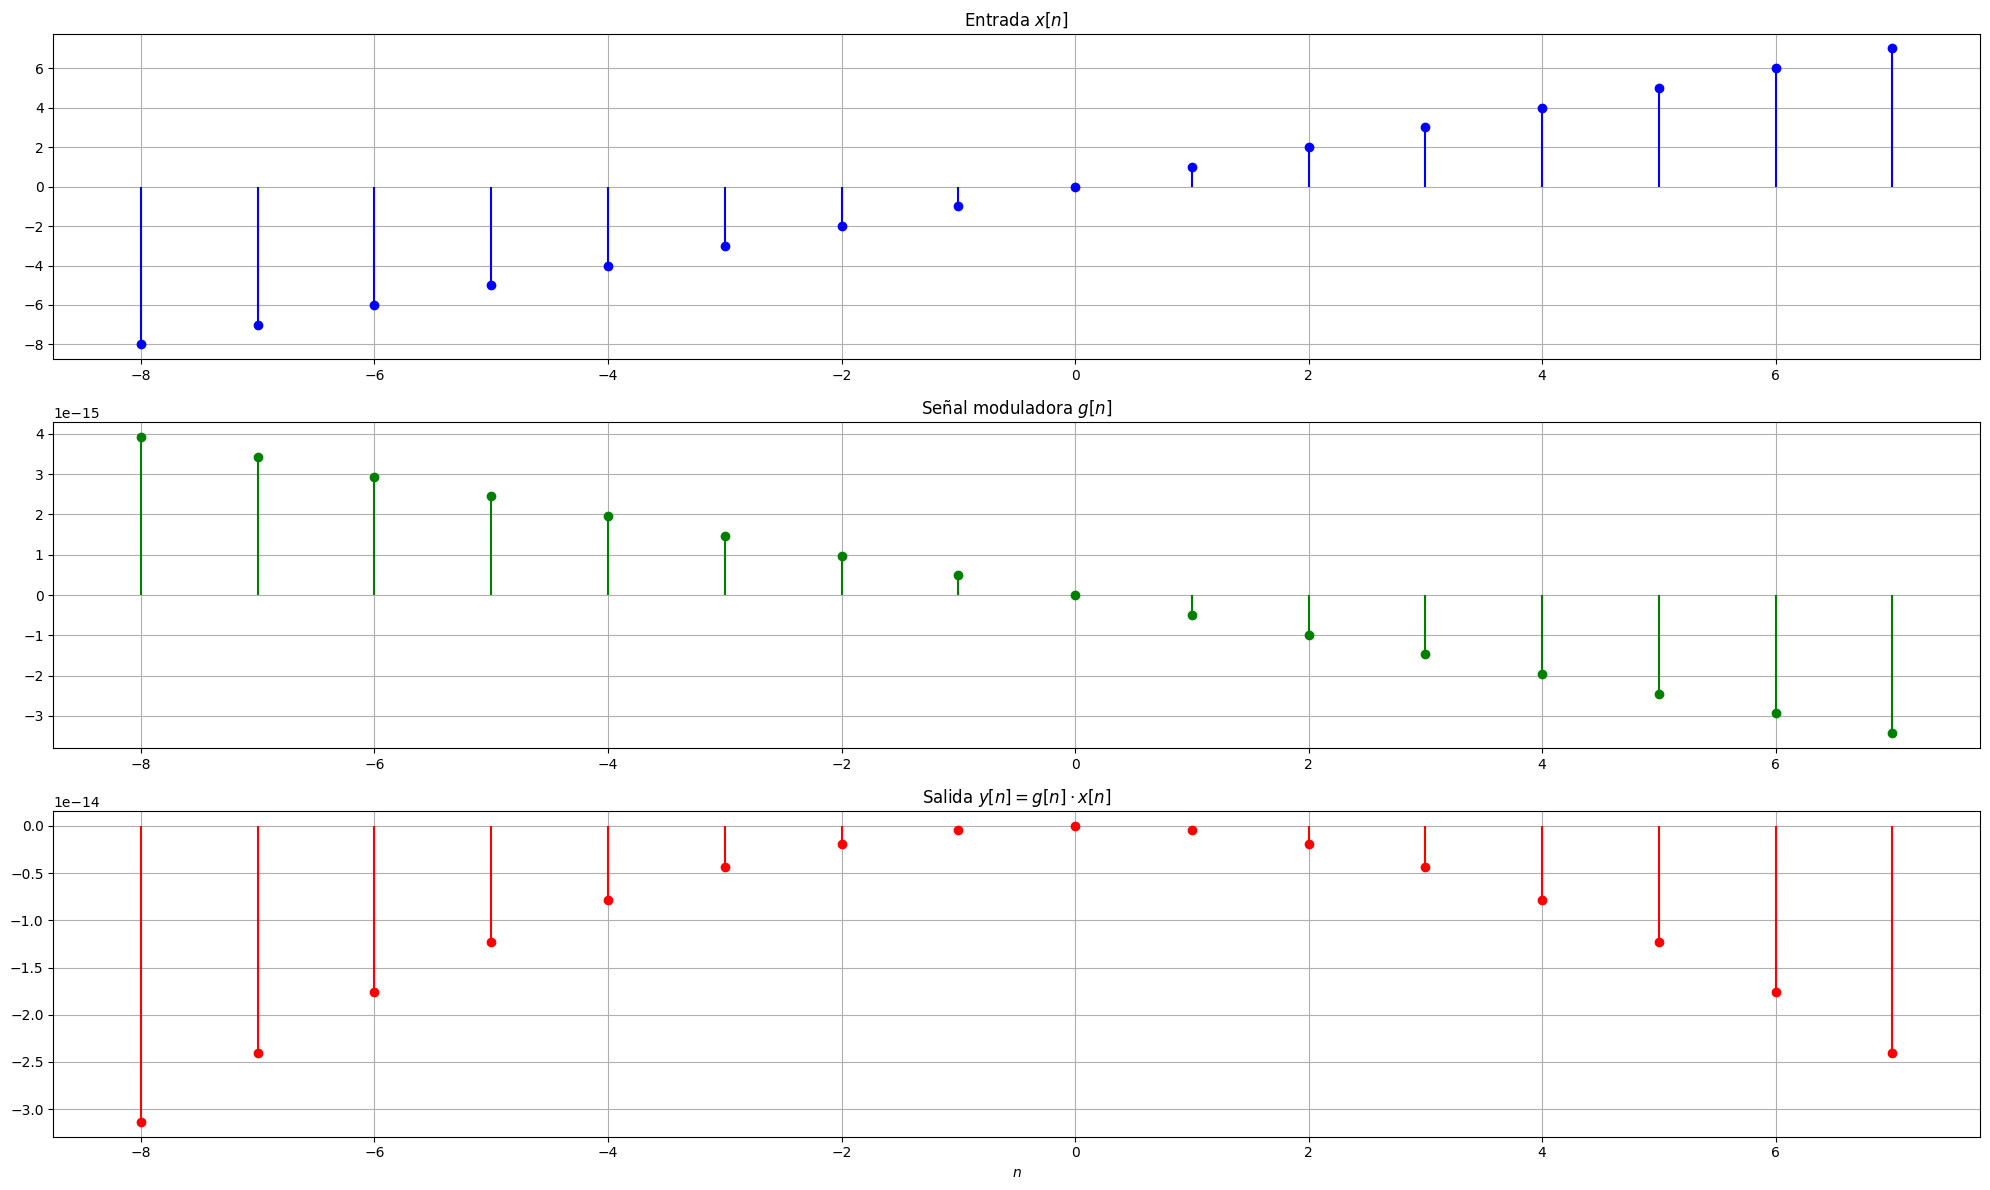

In [34]:
#==================================================
#=====================INCISO A=====================
#==================================================
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-8, 8)
g = 2 * np.sin( 2 * np.pi * 0.5 * n * 2)
                 
x = n
y = g * x


plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, g, basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("Señal moduladora $g[n]$")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title("Salida $y[n] = g[n] \\cdot x[n]$")
plt.xlabel("$n$")
plt.grid(True)

plt.tight_layout()
plt.show()

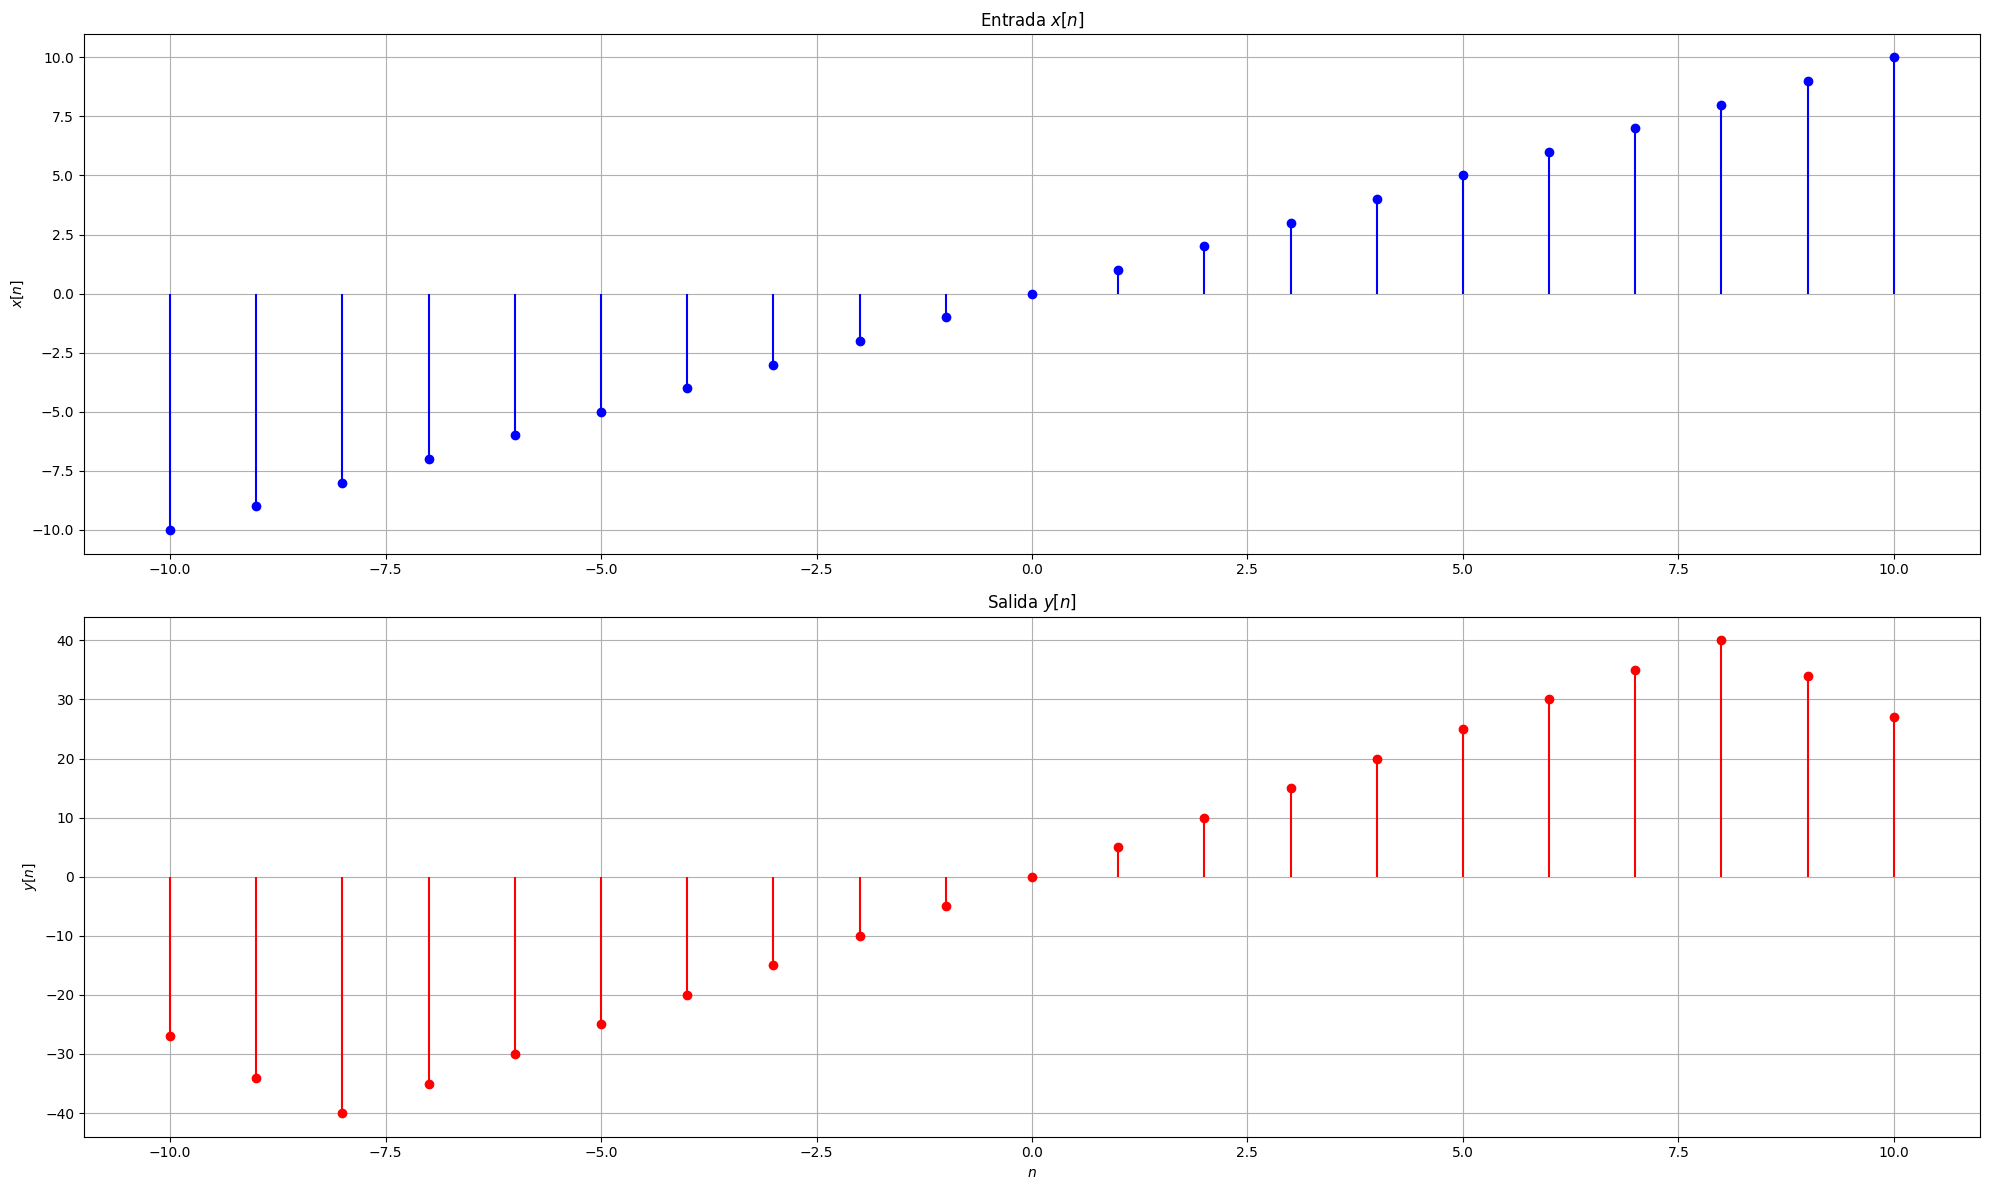

In [35]:
#==================================================
#=====================INCISO B=====================
#==================================================

n = np.arange(-10, 11)
n0 = 2  


#x = np.sin(2 * np.pi * n)
x = np.arange(-10, 11)
y = np.zeros_like(n, dtype=float)
for i, ni in enumerate(n):
    indices = (n >= ni - n0) & (n <= ni + n0)
    y[i] = np.sum(x[indices])

plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()

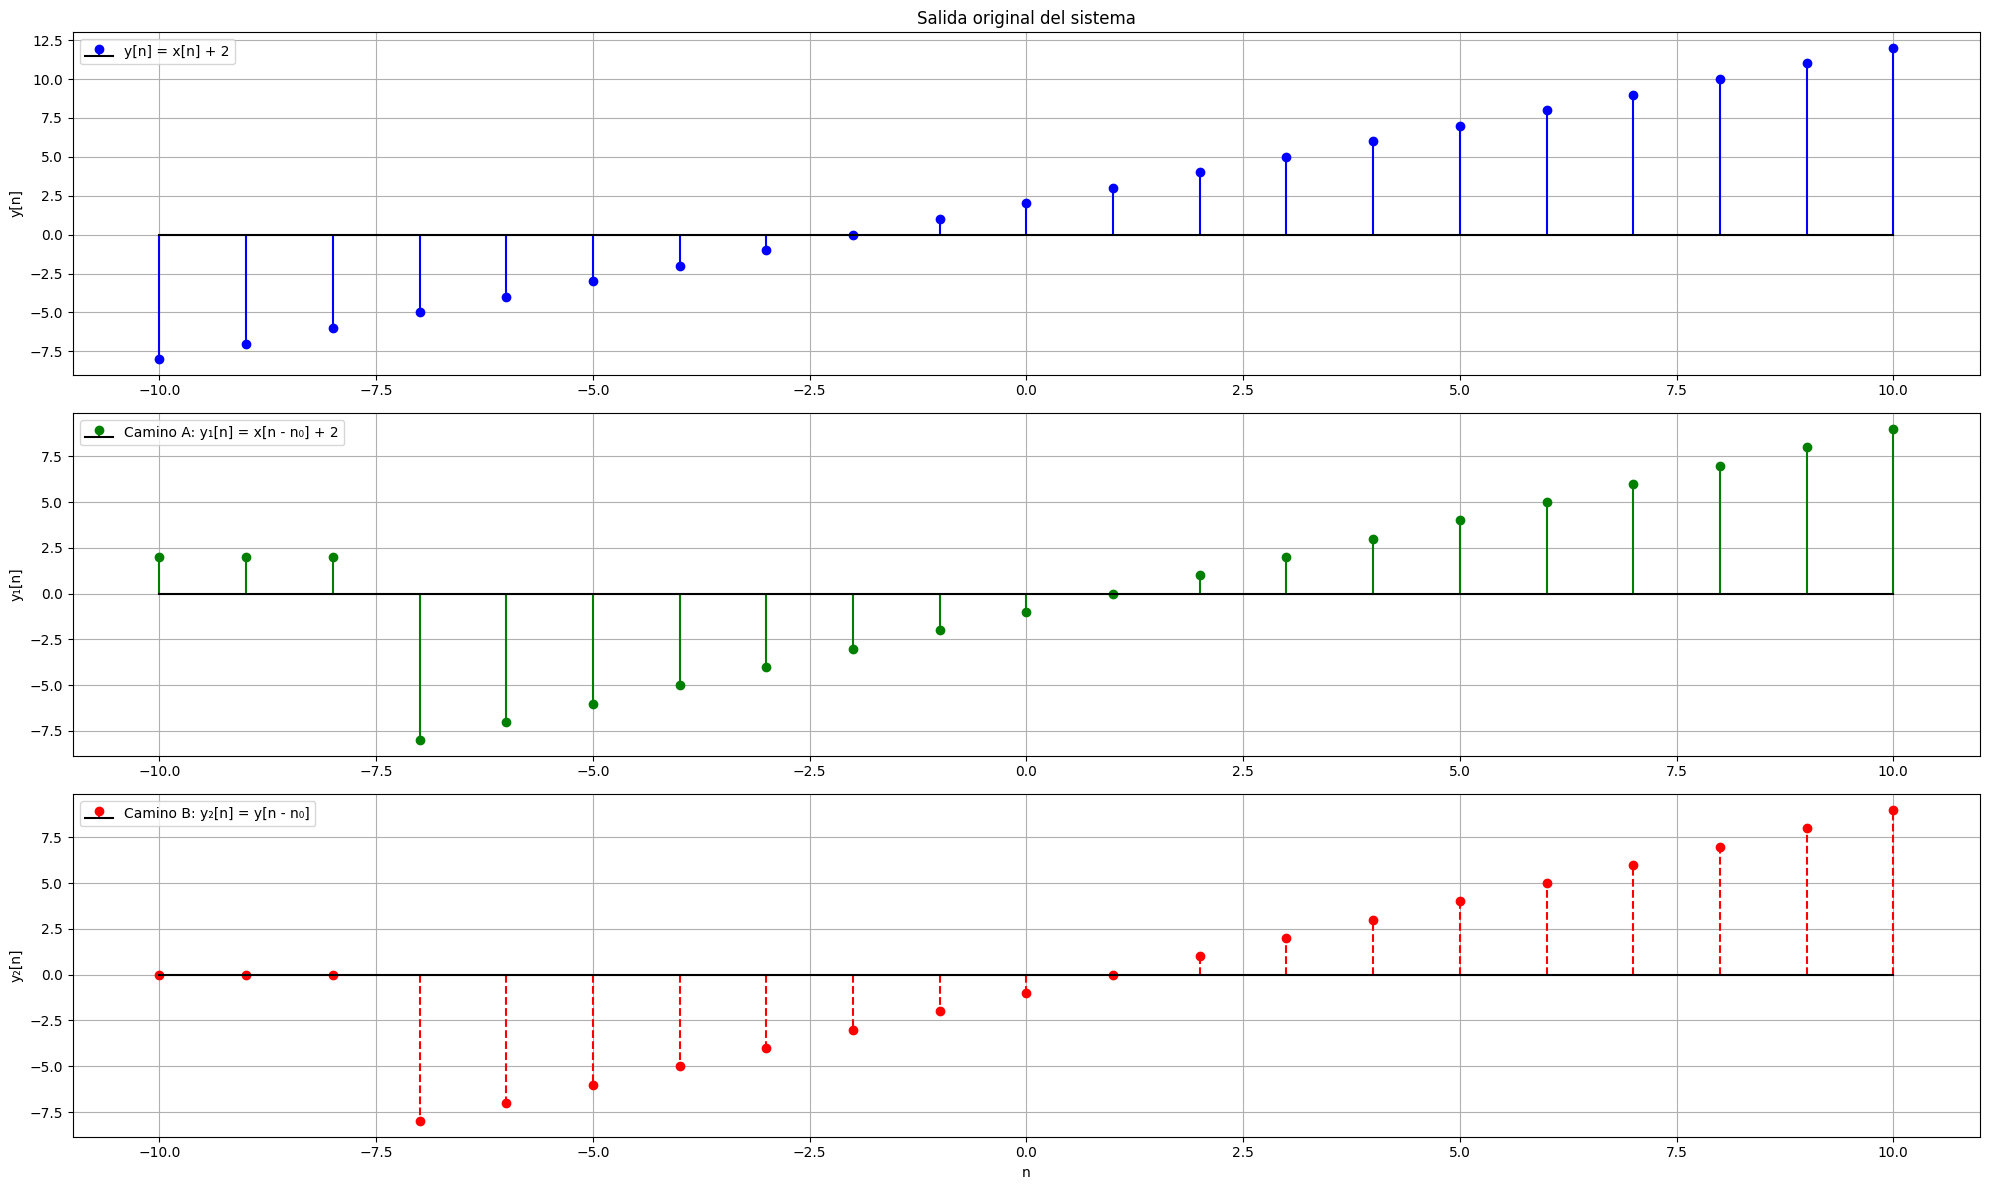

In [36]:
#==================================================
#=====================INCISO C=====================
#==================================================

n = np.arange(-10, 11,1)
desplazamiento = 3 

x = n
y = x + 2 
# Camino A: desplazar la entrada y luego aplicar el sistema
x_shifted = np.roll(x, desplazamiento)         # x[n - n0]
x_shifted[:desplazamiento] = 0                 
y1 = x_shifted + 2                 # y₁[n] = x[n - n₀] + 2

# Camino B: aplicar el sistema y luego desplazar la salida
y2 = np.roll(y, desplazamiento)                # y[n - n0]
y2[:desplazamiento] = 0

plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.stem(n, y, linefmt='b-', markerfmt='bo', basefmt='k-', label='y[n] = x[n] + 2')
plt.title('Salida original del sistema')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 2)
plt.stem(n, y1, linefmt='g-', markerfmt='go', basefmt='k-', label='Camino A: y₁[n] = x[n - n₀] + 2')
plt.ylabel('y₁[n]')
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 3)
plt.stem(n, y2, linefmt='r--', markerfmt='ro', basefmt='k-', label='Camino B: y₂[n] = y[n - n₀]')
plt.xlabel('n')
plt.ylabel('y₂[n]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

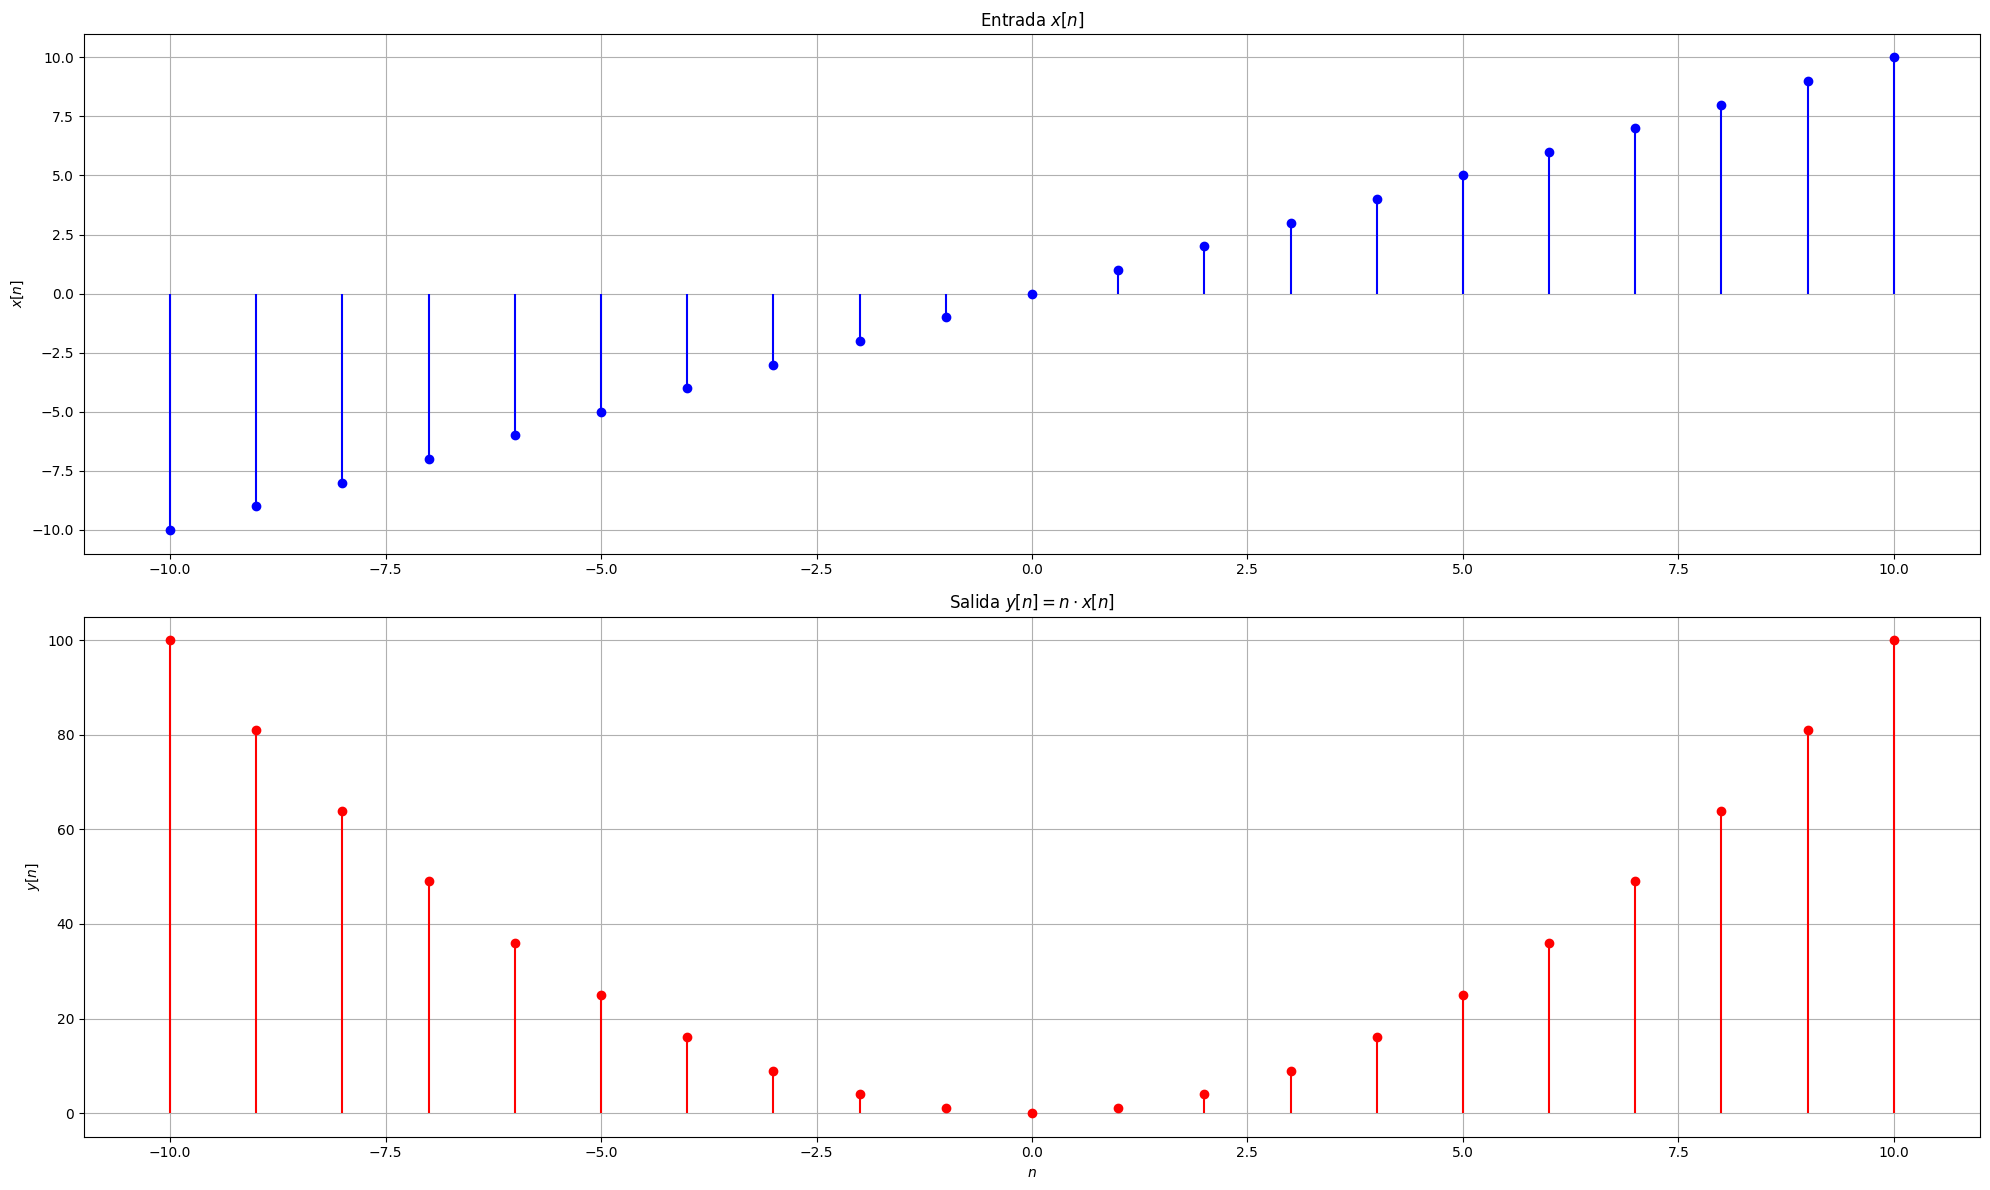

In [37]:
#==================================================
#=====================INCISO D=====================
#==================================================

n = np.arange(-10, 11)
x = np.arange(-10, 11)
y = n * x


plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n] = n \cdot x[n]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()

# SISTEMAS - Ejercicio 2
Considere el diagrama en bloques de la Figura 1 y encuentre la ecuación en diferencias para la señal de salida y[n] en función de la señal de entrada x[n].

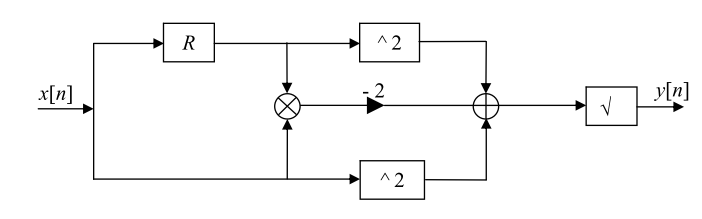

### Solución:
  ${y[n] = \sqrt{x[n-1]^2-2(x[n-1]x[n])+x[n]^2}}$ 

  <hr>

# SISTEMAS - Ejercicio 3
Considere el sistema LTI dado por la ecuación en diferencias ${y[n] − 0,5y[n−1]+0,25y[n−2] = x[n]}$ inicialmente en reposo. Encuentre el diagrama en bloques que lo representa.

### Solución:
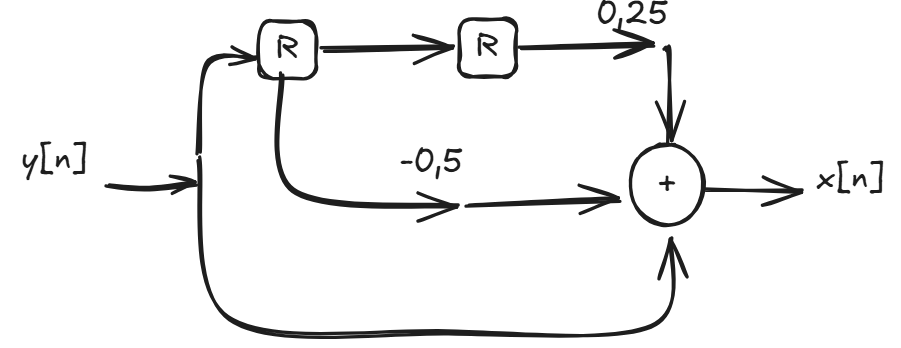
<hr>

# SISTEMAS - Ejercicio 4 
Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasif´ıquelos en funci´on de ´esta. Utilice condiciones iniciales nulas.

Si la salida es funcion de valores previos de la entrada son FIR (Respuesta finita al impulso) debido a que esta respuesta tiene. En el caso de los sistemas representados por ecuaciones recursivas se denominan de *respuesta infinita al impulso*

Los sistemas **FIR** son llamados de *promedios moviles o MA* ya que realizan un promedio de la entrada en sucesivos instantes de tiempo.

Los sistemas IIR se dividen en dos tipos
* **Sistemas autoregresivos (AR)** son aquellos en que la salida en el instante n depende solo de los valores anteriores de esta y del valor actual de la entrada, y la ecuacion es

$$y[n] = -\sum_{k = 1}^{N} \frac{a_k}{a_0}y[n-k] + x[n]$$

* **Sistemas ARMA** son aquellos en donde la salida depende de valores anteriores de la salida y de la entrada. La ecuacion es

$$y[n] = \frac{1}{a_0}[\sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N}a_k y[n-k]]$$

1. $y[n] - y[n-2] =x[n]$


[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


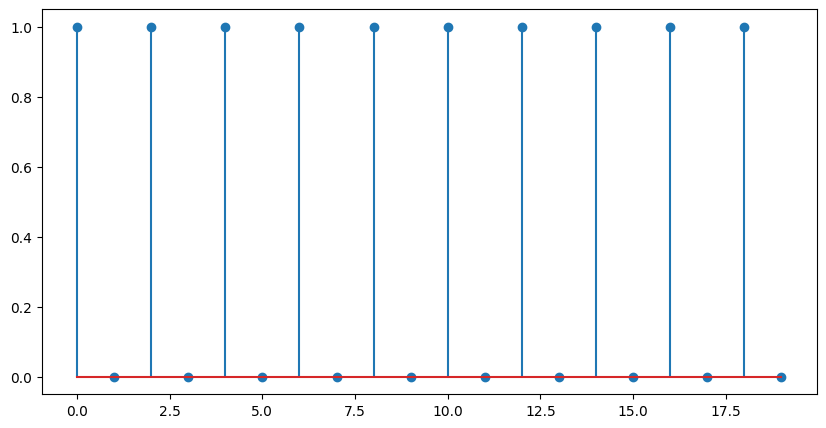

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# Inciso 1:
N = 20
x = np.zeros(N)
x[0] = 1
y = np.zeros(N)

# y[n-2] = y[n-1] = 0 cuando n = 0,1
y[0] = x[0] #y[n] = x[n] + y[n-2] => y[0] = x[0] + 0
y[1] = x[1] #y[n] = x[n] + y[n-2] => y[1] = x[1] + 0

for n in range(2,len(x)):
  y[n] = y[n-2] + x[n]
print(y)

plt.figure(figsize=(10, 5))
plt.stem(y)
plt.show()



Sistema: IIR (de respuesta infinita al impulso) ya que no oscila infinitamente entre 0 y 1

<hr>

2. $y[n] = x[n] + 0.5x[n-1]$



[1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]


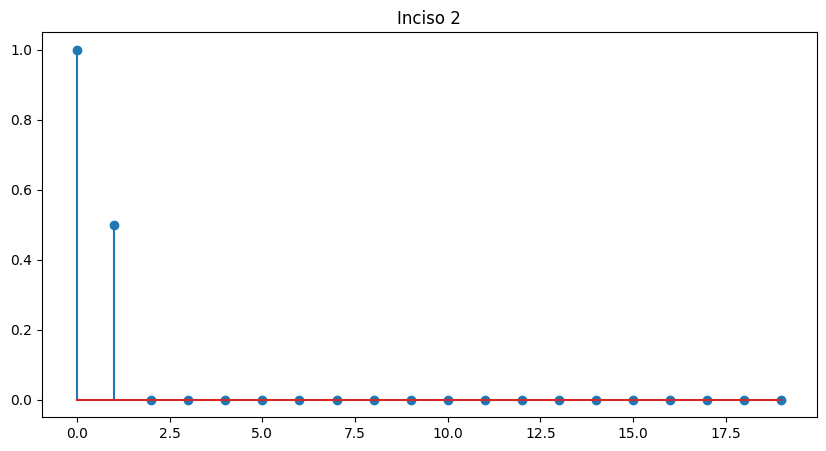

In [39]:
# Inciso 2:
x = np.zeros(N)
x[0] = 1
y = np.zeros(N)

y[0] = x[0] #y[0] = x[0] + x[0-1] => y[0] = x[0] + 0 
for n in range(1,len(x)):
  y[n] = x[n] + 0.5*x[n-1]

print(y)

plt.figure(figsize=(10, 5))
plt.title("Inciso 2")
plt.stem(y)
plt.show()

Sistema: FIR (Respuesta Finita al Impulso) debido a que luego de tiempo determinado (2 impulsos en este caso) el sistema se mantiene exactamente en cero.

<hr>

3. $y[n] - 0.5y[n-1]+0.25y[n-2] = x[n]$

[ 1.00000000e+00  5.00000000e-01  0.00000000e+00 -1.25000000e-01
 -6.25000000e-02  0.00000000e+00  1.56250000e-02  7.81250000e-03
  0.00000000e+00 -1.95312500e-03 -9.76562500e-04  0.00000000e+00
  2.44140625e-04  1.22070312e-04  0.00000000e+00 -3.05175781e-05
 -1.52587891e-05  0.00000000e+00  3.81469727e-06  1.90734863e-06]


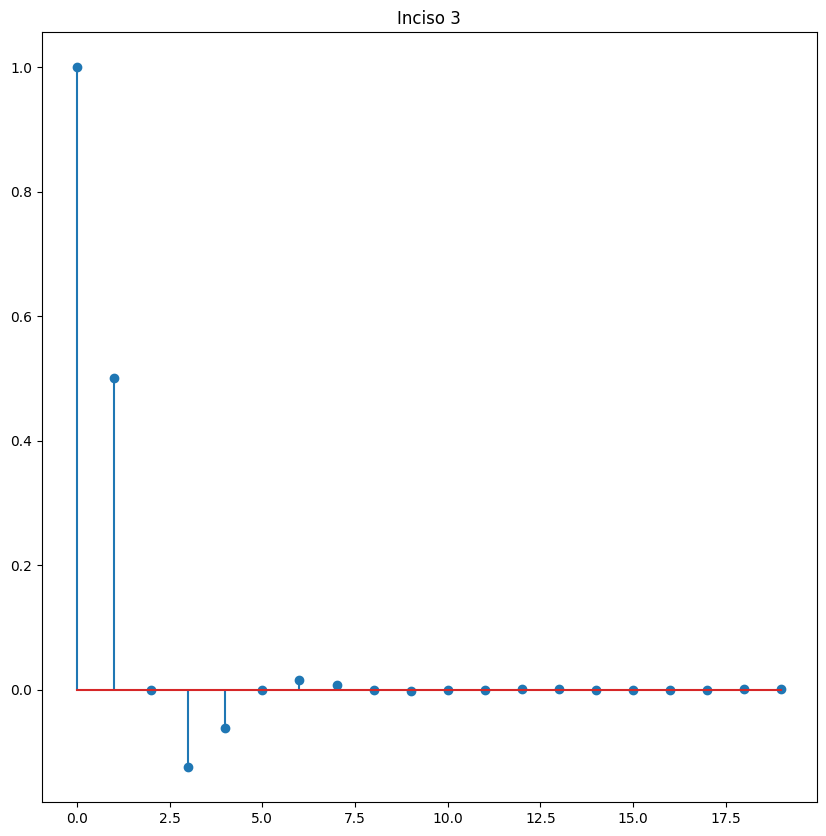

In [40]:
# Inciso 3:
x = np.zeros(N) 
y = np.zeros(N)
x[0] = 1
y[0] = x[0]   #y[0] = x[0] + 0.5y[0-1] - 0.25y[0-2] => y[0] = x[0] + 0 + 0
y[1] = x[1] + 0.5*y[0] #y[1] = x[1] + 0.5y[0] - 0.25y[0-1] => y[1] = x[1] + 0.5y[0] + 0  
for n in range(2,len(x)):
  y[n] = x[n] + 0.5*y[n-1] - 0.25*y[n-2]
print(y)
plt.figure(figsize=(10, 10))
plt.title("Inciso 3")
plt.stem(y)
plt.show()